# Graphs Are Coming

### A Game Of Thrones - Network Analysis

This dataset constitutes a network and is given as a text file describing the edges between characters, with some attributes attached to each edge. 

The resulting DataFrame book1 has 5 columns: Source, Target, Type, weight, and book. Source and target are the two nodes that are linked by an edge. A network can have directed or undirected edges and in this network all the edges are undirected. The weight attribute of every edge tells us the number of interactions that the characters have had over the book, and the book column tells us the book number.

Using : https://networkofthrones.wordpress.com/

### Importing modules

In [66]:
import pandas as pd
import networkx as nx
import operator
import itertools
from networkx.algorithms import community
from networkx.algorithms.community.centrality import girvan_newman

In [21]:
import matplotlib as plt

In [16]:
book1 = pd.read_csv('datasets/book1.csv')
book2 = pd.read_csv('datasets/book2.csv')
book3 = pd.read_csv('datasets/book3.csv')
book4 = pd.read_csv('datasets/book4.csv')
book5 = pd.read_csv('datasets/book5.csv')

In [3]:
book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


Creating undirected graphs

In [17]:
g_book1 = nx.from_pandas_edgelist(book1, 'Source', 'Target', ['weight'])
g_book2 = nx.from_pandas_edgelist(book2, 'Source', 'Target', ['weight'])
g_book3 = nx.from_pandas_edgelist(book3, 'Source', 'Target', ['weight'])
g_book4 = nx.from_pandas_edgelist(book4, 'Source', 'Target', ['weight'])
g_book5 = nx.from_pandas_edgelist(book5, 'Source', 'Target', ['weight'])

In [23]:
books = [book1,book2,book3,book4,book5]

Creating list of graphs

In [24]:
graphs = [g_book1,g_book2,g_book3,g_book4,g_book5]

## 1. Graph Analysis

### 1.1 Number of nodes in books

In [67]:
nodes = [nx.number_of_nodes(g) for g in graphs]

In [69]:
print("The total number of nodes in the 5 books are :",nodes)

The total number of nodes in the 5 books are : [187, 259, 303, 274, 317]


### 1.2 Number of Edges

In [70]:
edges = [nx.number_of_edges(g) for g in graphs]

In [71]:
print("The total number of edges in the 5 books are :",edges)

The total number of edges in the 5 books are : [684, 775, 1008, 682, 760]


### 1.3 Is the graph connected?

In [73]:
is_connected = [nx.is_connected(g) for g in graphs]

In [74]:
print("Graph connectedness for 5 books: ", is_connected)

Graph connectedness for 5 books:  [True, True, True, True, True]


### 1.4 The longest shortest connection present

In [76]:
diameter = [nx.diameter(g) for g in graphs]

In [77]:
print("The diameters of various graphs are", diameter)

The diameters of various graphs are [7, 8, 8, 10, 8]


### 1.5 The average clustering coefficient for all graphs

In [78]:
clustering_coefficient = [nx.average_clustering(g) for g in graphs]

In [79]:
print('The average clustering coefficient for all graphs',clustering_coefficient)

The average clustering coefficient for all graphs [0.5121189412047715, 0.48548434298621435, 0.5312298126585134, 0.4286641440606227, 0.4933290284905826]


## 2. Most important character in Game of Thrones

In [14]:
def find_top_5(d):
    sorted_data = sorted(d.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_data[0:5]

In [9]:
deg_cen_book1 = nx.degree_centrality(g_book1)

In [18]:
deg_cen_book5 = nx.degree_centrality(g_book5)

In [15]:
find_top_5(deg_cen_book1)

[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.2688172043010753),
 ('Tyrion-Lannister', 0.24731182795698928),
 ('Catelyn-Stark', 0.23118279569892475),
 ('Jon-Snow', 0.19892473118279572)]

In [20]:
find_top_5(deg_cen_book5)

[('Jon-Snow', 0.1962025316455696),
 ('Daenerys-Targaryen', 0.18354430379746836),
 ('Stannis-Baratheon', 0.14873417721518986),
 ('Tyrion-Lannister', 0.10443037974683544),
 ('Theon-Greyjoy', 0.10443037974683544)]

In [22]:
%matplotlib inline

Creating a list of books

In [25]:
evol = [nx.degree_centrality(g) for g in graphs]

In [26]:
degree_evol_df = pd.DataFrame.from_records(evol)

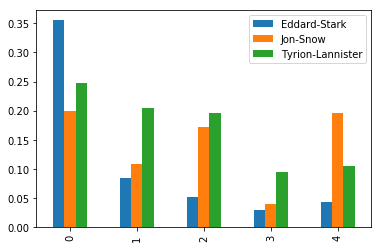

In [127]:
degree_evol_df[['Eddard-Stark','Jon-Snow', 'Tyrion-Lannister']].plot(kind = 'bar')

In [34]:
betweenness_centrality = [nx.betweenness_centrality(g, weight='weight') for g in graphs]

In [35]:
betweenness_centrality_df = pd.DataFrame.from_records(betweenness_centrality)

In [36]:
# Finding the top 5 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_centrality_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

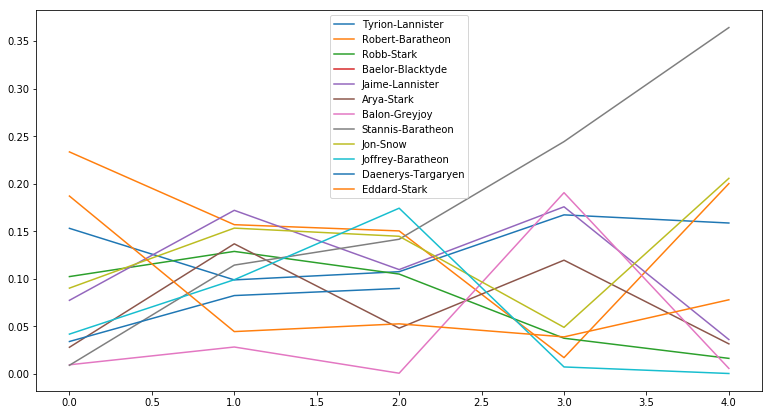

In [38]:
betweenness_centrality_df[list_of_char].plot(figsize=(13, 7))

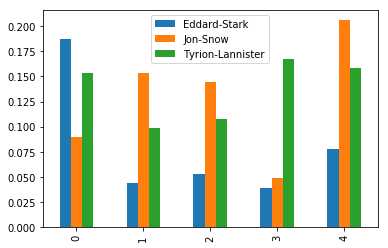

In [126]:
betweenness_centrality_df[['Eddard-Stark','Jon-Snow', 'Tyrion-Lannister']].plot(kind = 'bar')

## Closeness Centrality

In [61]:
closeness_centrality = [nx.closeness_centrality(g) for g in graphs]

In [62]:
closeness_centrality_df = pd.DataFrame.from_records(closeness_centrality)

In [63]:
find_top_5(closeness_centrality[4])

[('Stannis-Baratheon', 0.4322845417236662),
 ('Tyrion-Lannister', 0.40254777070063696),
 ('Robert-Baratheon', 0.4005069708491762),
 ('Cersei-Lannister', 0.39848675914249687),
 ('Eddard-Stark', 0.3761904761904762)]

In [64]:
find_top_5(closeness_centrality[0])

[('Eddard-Stark', 0.5636363636363636),
 ('Robert-Baratheon', 0.5454545454545454),
 ('Tyrion-Lannister', 0.510989010989011),
 ('Catelyn-Stark', 0.5054347826086957),
 ('Robb-Stark', 0.49732620320855614)]

Let's check evolution of closeness centrality for eddard over the 5 books.

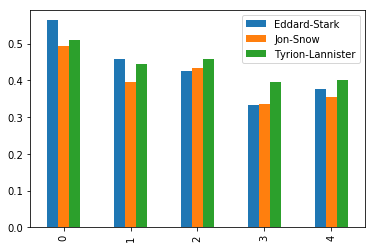

In [128]:
closeness_centrality_df[['Eddard-Stark','Jon-Snow', 'Tyrion-Lannister']].plot(kind = 'bar')

Eddard Stark's high closeness centrality and degree centrality in book1 indicate that he is a key player and is tied to important actors. Eddard also boasts a high closeness centrality in book 3, but a low betweeness centrality. It shows that he is important to the network. However, so are many others.

## PageRank

In [39]:
pagerank = [nx.pagerank(g) for g in graphs]

In [40]:
pagerank_df = pd.DataFrame.from_records(pagerank)

In [41]:
# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

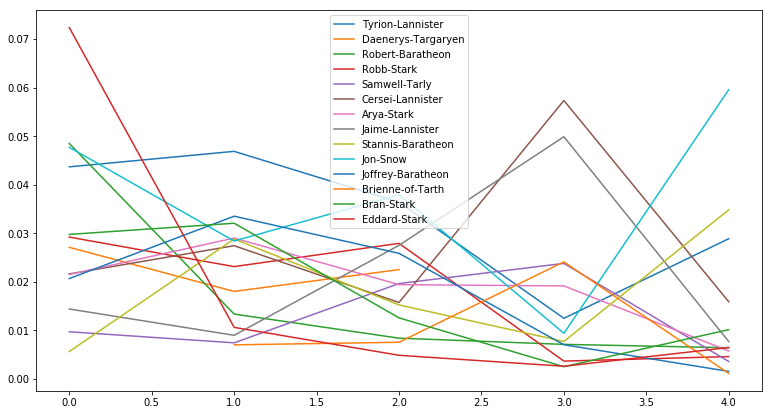

In [42]:
pagerank_df[list_of_char].plot(figsize=(13, 7))

In [103]:
find_top_5(pagerank[0])

[('Eddard-Stark', 0.07236162026570053),
 ('Robert-Baratheon', 0.04849367196106828),
 ('Jon-Snow', 0.04770801150205559),
 ('Tyrion-Lannister', 0.04367631315626212),
 ('Catelyn-Stark', 0.03466661321136357)]

## Correlation Between Different centrality measures and pagerank

In [81]:
measures = [nx.pagerank(graphs[0]), 
            nx.betweenness_centrality(graphs[0], weight='weight'), 
            nx.closeness_centrality(graphs[0]),
            nx.degree_centrality(graphs[0])]

In [82]:
cor = pd.DataFrame.from_records(measures)

In [83]:
cor.T.corr()

,0,1,2,3
0,1.000000,0.870210,0.686706,0.949258
1,0.870210,1.000000,0.675276,0.871385
2,0.686706,0.675276,1.000000,0.796965
3,0.949258,0.871385,0.796965,1.000000


In [86]:
p_rank, b_cent, d_cent, c_cent = cor.idxmax(axis=1)

In [87]:
print(p_rank, b_cent, d_cent, c_cent)

Eddard-Stark Robert-Baratheon Eddard-Stark Eddard-Stark


## Characters with highest Authority Score according to HITS

Let's analyze the communities in book 1 using the girvan newman algorithm

In [100]:
hubs_book1, authority_book1 = nx.hits(g_book1)

In [102]:
top_5_auth_nodes = find_top_5(authority_book1)
print(' Top 5 Nodes with highest authority score according to HITS are:')
print(top_5_auth_nodes)

 Top 5 Nodes with highest authority score according to HITS are:
[('Eddard-Stark', 0.1117125384588925), ('Robert-Baratheon', 0.10230833796669758), ('Cersei-Lannister', 0.04730314638196685), ('Sansa-Stark', 0.0370270006589419), ('Petyr-Baelish', 0.036380376252056056)]


## 3. Finding Communities using Girvan Newman Algorithm

In [106]:
comp = girvan_newman(g_book1)

In [107]:
first_iteration = tuple(sorted(c) for c in next(comp))

In [108]:
dict_comp = dict(enumerate(first_iteration))

In [109]:
len(dict_comp)

2

Two communities formed after first iteration. Let's try book 5.

In [115]:
dict_comp

{0: ['Addam-Marbrand',
  'Aemon-Targaryen-(Maester-Aemon)',
  'Aerys-II-Targaryen',
  'Albett',
  'Alliser-Thorne',
  'Alyn',
  'Arthur-Dayne',
  'Arya-Stark',
  'Arys-Oakheart',
  'Balon-Greyjoy',
  'Balon-Swann',
  'Barristan-Selmy',
  'Benjen-Stark',
  'Beric-Dondarrion',
  'Boros-Blount',
  'Bowen-Marsh',
  'Bran-Stark',
  'Brandon-Stark',
  'Bronn',
  'Brynden-Tully',
  'Catelyn-Stark',
  'Cayn',
  'Cersei-Lannister',
  'Chella',
  'Chett',
  'Chiggen',
  'Clement-Piper',
  'Clydas',
  'Colemon',
  'Conn',
  'Coratt',
  'Danwell-Frey',
  'Dareon',
  'Daryn-Hornwood',
  'Desmond',
  'Dolf',
  'Donal-Noye',
  'Donnel-Waynwood',
  'Dywen',
  'Eddard-Stark',
  'Edmure-Tully',
  'Eon-Hunter',
  'Galbart-Glover',
  'Gared',
  'Gendry',
  'Gerold-Hightower',
  'Gregor-Clegane',
  'Grenn',
  'Gunthor-son-of-Gurn',
  'Halder',
  'Hali',
  'Hallis-Mollen',
  'Harwin',
  'Harys-Swyft',
  'Heward',
  'High-Septon-(fat_one)',
  'Hobb',
  'Hodor',
  'Hosteen-Frey',
  'Hoster-Tully',
  'Howland-

In [117]:
comp_book5 = girvan_newman(g_book2)
first_iteration = tuple(sorted(c) for c in next(comp))
dict_comp = dict(enumerate(first_iteration))
len(dict_comp)

5

In [121]:
dict_comp

{0: ['Addam-Marbrand',
  'Aemon-Targaryen-(Maester-Aemon)',
  'Aerys-II-Targaryen',
  'Albett',
  'Alliser-Thorne',
  'Alyn',
  'Arthur-Dayne',
  'Arya-Stark',
  'Arys-Oakheart',
  'Balon-Greyjoy',
  'Balon-Swann',
  'Barristan-Selmy',
  'Benjen-Stark',
  'Beric-Dondarrion',
  'Boros-Blount',
  'Bowen-Marsh',
  'Bran-Stark',
  'Brandon-Stark',
  'Bronn',
  'Brynden-Tully',
  'Catelyn-Stark',
  'Cayn',
  'Cersei-Lannister',
  'Chella',
  'Chett',
  'Chiggen',
  'Clement-Piper',
  'Clydas',
  'Colemon',
  'Dareon',
  'Daryn-Hornwood',
  'Desmond',
  'Donal-Noye',
  'Donnel-Waynwood',
  'Dywen',
  'Eddard-Stark',
  'Edmure-Tully',
  'Eon-Hunter',
  'Galbart-Glover',
  'Gared',
  'Gendry',
  'Gerold-Hightower',
  'Gregor-Clegane',
  'Grenn',
  'Gunthor-son-of-Gurn',
  'Halder',
  'Hali',
  'Hallis-Mollen',
  'Harwin',
  'Harys-Swyft',
  'Heward',
  'High-Septon-(fat_one)',
  'Hobb',
  'Hodor',
  'Hoster-Tully',
  'Howland-Reed',
  'Hugh',
  'Hullen',
  'Ilyn-Payne',
  'Jacks',
  'Jafer-Flo